In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_student_date_site_sumclick_aggregated_tensor(tmp):
    '''
    pandas.DataFrame based on studentVle with multiindex
    '''
    all_id_student = tmp.index.get_level_values('id_student').unique().values
    
    return np.sort(all_id_student), np.nan_to_num(tmp.squeeze().to_xarray().to_numpy(), copy=False, nan=0.0)

In [3]:
studentData_DDD = pd.read_csv('../data/studentData_DDD_all_yrs.csv')

In [4]:
# usuwam tych, którzy nie pisali egzaminu i olali po prostu
studentData_DDD = studentData_DDD.loc[np.logical_not(studentData_DDD.score.isnull())]

In [5]:
studentData_DDD.loc[studentData_DDD[['code_presentation']].applymap(lambda x: x in ['2013J', '2014J']).values].shape

(1683, 13)

In [6]:
studentData_DDD = studentData_DDD.set_index(['id_student']).sort_index()
studentData_DDD.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,studied_credits,disability,final_result,date_submitted,score
id_student,,,,,,,,,,,,
28046,DDD,2013J,F,Yorkshire Region,HE Qualification,10-20,35-55,70,N,Fail,237.0,40.0
29411,DDD,2013J,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,60,N,Pass,237.0,62.0
33930,DDD,2013J,F,South West Region,A Level or Equivalent,20-30%,0-35,90,N,Pass,237.0,67.0
40184,DDD,2013J,M,Wales,HE Qualification,30-40%,55<=,60,N,Distinction,241.0,100.0
40563,DDD,2013J,F,South East Region,A Level or Equivalent,0-10%,0-35,60,N,Pass,237.0,49.0


In [7]:
# być może oddzielę J od B tak jak zalecają, bo struktury kursów się różnią trochę
# ale może to nie będzie tak znaczące

In [8]:
studentVle_xxx = pd.read_csv('../data/studentVle.csv')
display(studentVle_xxx.head())

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


,date
count,536837.000000
mean,81.923148
std,69.382794
min,-16.000000
25%,22.000000
50%,69.000000
75%,135.000000
max,240.000000


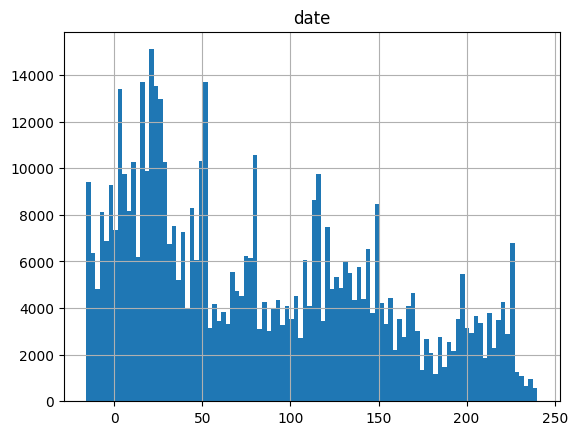

In [9]:
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2013B')][['date']].hist(bins=100)
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2013B')][['date']].describe()


,date
count,680806.000000
mean,94.970291
std,78.558483
min,-18.000000
25%,23.000000
50%,86.000000
75%,159.000000
max,261.000000


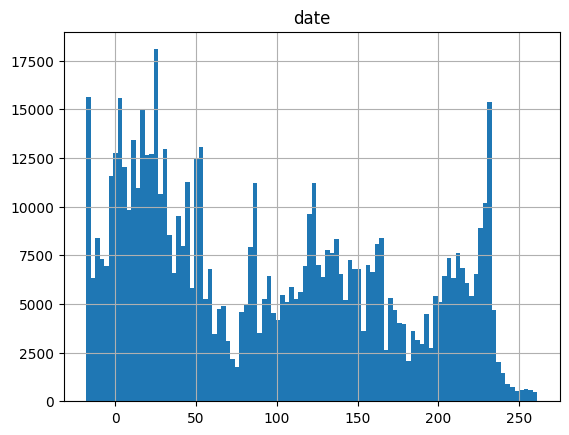

In [10]:
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2013J')][['date']].hist(bins=100)
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2013J')][['date']].describe()


,date
count,379942.000000
mean,82.832332
std,73.759238
min,-18.000000
25%,19.000000
50%,64.000000
75%,139.000000
max,241.000000


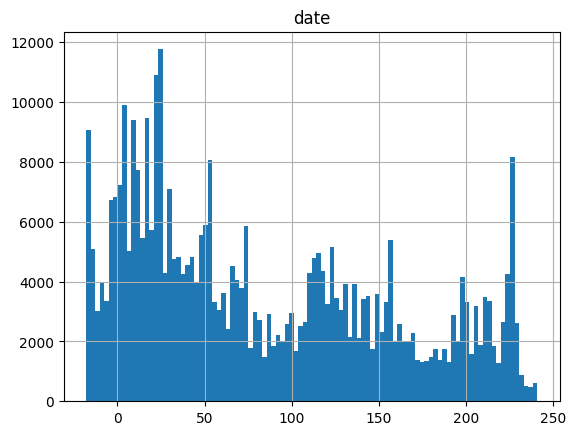

In [11]:
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2014B')][['date']].hist(bins=100)
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2014B')][['date']].describe()


,date
count,568901.000000
mean,97.767524
std,82.497680
min,-25.000000
25%,23.000000
50%,87.000000
75%,168.000000
max,262.000000


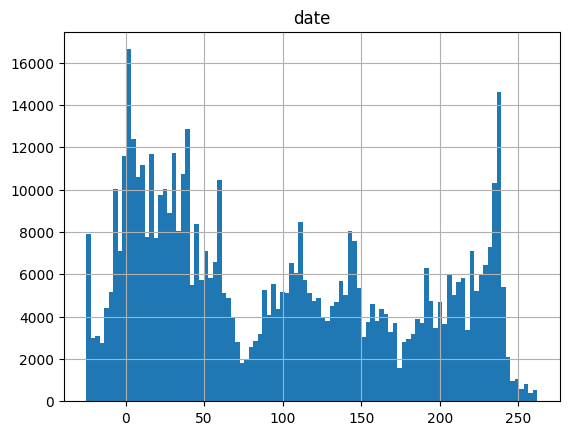

In [12]:
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2014J')][['date']].hist(bins=100)
studentVle_xxx.set_index(['code_module', 'code_presentation']).loc[('DDD', '2014J')][['date']].describe()


In [13]:
studentData_DDD.index.unique()

Int64Index([  28046,   29411,   33930,   40184,   40563,   46753,   48152,
              50476,   51030,   51033,
            ...
            2685863, 2686578, 2688692, 2689536, 2692577, 2693243, 2694886,
            2694933, 2695608, 2698251],
           dtype='int64', name='id_student', length=2640)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


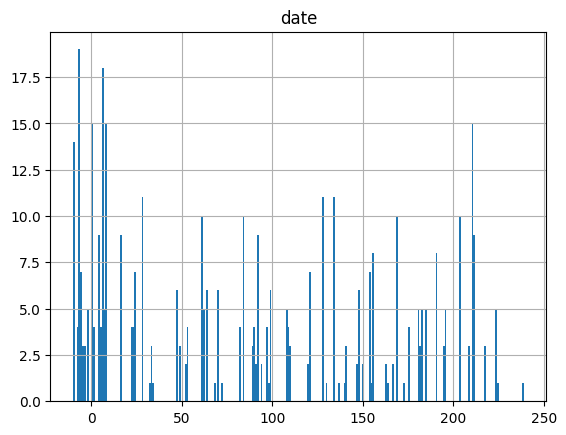

In [14]:
studentVle_xxx.set_index(['id_student']).loc[28400][['date']].hist(bins=250)

studentVle_xxx.head()

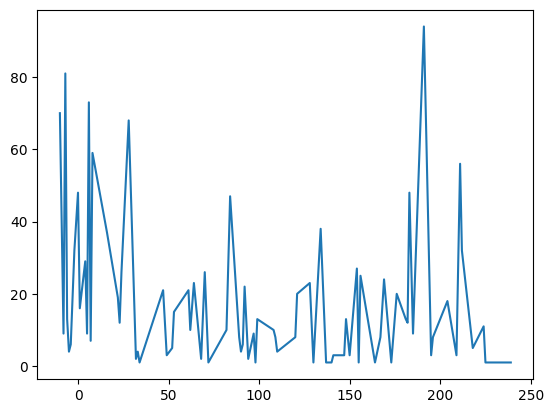

In [15]:
import matplotlib.pyplot as plt

plt.plot(studentVle_xxx.set_index(['id_student']).loc[28400].groupby(by='date').sum(numeric_only=True)['sum_click'])
# [['date']]

In [16]:
# elements of filter vle function
studentVle_tmp = pd.read_csv('../data/studentVle.csv')
# studentData_DDD.index.values

In [17]:
studentVle_tmp = studentVle_tmp.loc[studentVle_tmp.code_module=='DDD'].drop(columns=['code_module', 'code_presentation'])
display(studentVle_tmp)

,id_student,id_site,date,sum_click
3125689,430516,547493,-16,3
3125690,430516,547303,-16,6
3125691,430516,547814,-16,2
3125692,420388,547810,-16,1
3125693,420388,547303,-16,3
...,...,...,...,...
5292170,63015,813710,262,3
5292171,63015,813710,262,2
5292172,63015,813701,262,3
5292173,63015,813708,262,1


In [18]:
# tutaj można pofiltrować odpowiednie materiały do interakcji i to raczej bedzie robione później
studentVle_tmp = studentVle_tmp.drop(columns=['id_site']).groupby(by=['id_student', 'date']).sum().sort_index().reset_index()

In [19]:
display(studentVle_tmp)
# studentVle_tmp..loc[studentVle_tmp[['id_student']].applymap(lambda x: x in studentData_DDD.index.values)]
# studentVle_tmp[['id_student']].applymap(lambda x: x in studentData_DDD.index.values)

,id_student,date,sum_click
0,8462,-6,10
1,8462,-4,2
2,8462,-3,39
3,8462,-2,20
4,8462,-1,10
...,...,...,...
389545,2698251,222,7
389546,2698251,226,82
389547,2698251,227,9
389548,2698251,228,13


In [20]:
studentVle_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389550 entries, 0 to 389549
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id_student  389550 non-null  int64
 1   date        389550 non-null  int64
 2   sum_click   389550 non-null  int64
dtypes: int64(3)
memory usage: 8.9 MB


In [21]:
studentVle_tmp = studentVle_tmp.loc[studentVle_tmp[['id_student']].applymap(lambda x: x in studentData_DDD.index.values).values].set_index(['id_student', 'date'])

In [22]:
studentVle_tmp.index.get_level_values(level='id_student').unique()

Int64Index([  28046,   29411,   33930,   40184,   40563,   46753,   48152,
              50476,   51030,   51033,
            ...
            2685863, 2686578, 2688692, 2689536, 2692577, 2693243, 2694886,
            2694933, 2695608, 2698251],
           dtype='int64', name='id_student', length=2640)

In [23]:
def get_filtered_vle(code_module, code_presentation_list, id_student_list:np.ndarray, date_range):
    studentVle_tmp = pd.read_csv('../data/studentVle.csv')
    studentVle_tmp = studentVle_tmp.loc[studentVle_tmp[['code_presentation']].applymap(lambda x: x in code_presentation_list).values]
    studentVle_tmp = studentVle_tmp.loc[studentVle_tmp[['date']].applymap(lambda x: x in date_range).values]
    studentVle_tmp = studentVle_tmp.loc[studentVle_tmp.code_module==code_module].drop(columns=['code_module', 'code_presentation'])
    studentVle_tmp = studentVle_tmp.drop(columns=['id_site']).groupby(by=['id_student', 'date']).sum().sort_index().reset_index()
    studentVle_tmp = studentVle_tmp.loc[studentVle_tmp[['id_student']].applymap(lambda x: x in id_student_list).values].set_index(['id_student', 'date'])
    
    return studentVle_tmp

In [24]:
studentData_DDD_J = studentData_DDD.loc[studentData_DDD[['code_presentation']].applymap(lambda x: x in ['2013J', '2014J']).values]

In [25]:
v = get_filtered_vle('DDD', ['2013J', '2014J'], studentData_DDD_J.index.get_level_values(level='id_student'), list(range(-10, 262)))

In [26]:
v.index.get_level_values(level='id_student').unique()

Int64Index([  28046,   29411,   33930,   40184,   40563,   48152,   51033,
              51153,   51163,   51955,
            ...
            2658898, 2662152, 2671469, 2677097, 2677210, 2678380, 2684043,
            2685863, 2686578, 2695608],
           dtype='int64', name='id_student', length=1683)

In [27]:
# doll = pd.DataFrame(data = {"x":[2,1,2],"a":[9,5,8], "b":[0,9,9]}).set_index(['x','a'])
# display(doll)

In [28]:
# np.nan_to_num(doll.squeeze().to_xarray().to_numpy())
# doll.squeeze().to_xarray().to_numpy()

In [29]:
used_id_student, student_date_site_sumclick_aggregated_tensor = get_student_date_site_sumclick_aggregated_tensor(v)

In [30]:
used_id_student.shape
used_id_student

array([  28046,   29411,   33930, ..., 2685863, 2686578, 2695608])

In [31]:
student_date_site_sumclick_aggregated_tensor.shape

(1683, 272)

In [32]:
student_date_site_sumclick_aggregated_tensor

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  8.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [61., 16.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
studentData_DDD_J = studentData_DDD_J.sort_index()

In [34]:
studentData_DDD_J.to_csv('../data/studentInfo_DDDJ_v1.csv')
np.save('../data/studentVle_DDDJ_v1.npy', student_date_site_sumclick_aggregated_tensor)